<a href="https://colab.research.google.com/github/AbdulWahabRaza123/NLP/blob/main/EmailClassificationUsingBERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [3]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/47_BERT_text_classification/spam.csv")
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [5]:
#checking value count
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [6]:
#our dataset is imbalance because there are lot of the ham emails but spam emails are less
747/4825	

0.15481865284974095

In [7]:
#checking spam emails
df_spam=df[df['Category']=='spam']
df_spam.shape

(747, 2)

In [8]:
#checking ham emails
df_ham=df[df['Category']=='ham']
df_ham.shape

(4825, 2)

In [9]:
#Now we can check the ham emails
df_ham.sample(2)

,Category,Message
4946,ham,Anyway I don't think I can secure anything up ...
363,ham,Check audrey's status right now


In [10]:
df_ham_downsampling=df_ham.sample(df_spam.shape[0])
df_ham_downsampling.shape

(747, 2)

In [11]:
# How we got the equal number of samples of spam emails from ham emails
df_ham_downsampling.sample(2)

,Category,Message
3925,ham,How? Izzit still raining?
2560,ham,I also thk too fast... Xy suggest one not me. ...


In [12]:
#Now I am going to merge the spam and ham emails to balance them
df_balanced=pd.concat([df_spam,df_ham_downsampling])
df_balanced.shape

(1494, 2)

In [13]:
df_balanced['Category'].value_counts()

spam    747
ham     747
Name: Category, dtype: int64

In [14]:
df_balanced.sample(5)

,Category,Message
4898,ham,I cant pick the phone right now. Pls send a me...
3838,ham,Early bird! Any purchases yet?
882,ham,"see, i knew giving you a break a few times wou..."
3250,ham,"Sorry, I can't help you on this."
2496,spam,WINNER! As a valued network customer you hvae ...


In [15]:
df_balanced['spam']=df_balanced['Category'].apply(lambda x: 1 if x=='spam' else 0)
df_balanced.sample(5)

,Category,Message,spam
5471,ham,Yup,0
1225,spam,You are a winner U have been specially selecte...,1
4351,ham,Yes. Rent is very expensive so its the way we ...,0
2480,spam,Sppok up ur mob with a Halloween collection of...,1
4036,spam,YOU ARE CHOSEN TO RECEIVE A £350 AWARD! Pls ca...,1


In [16]:
#Now going to split the traiining set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_balanced['Message'],df_balanced['spam'],stratify=df_balanced['spam'])

In [17]:
X_train.head(5)

4090    How are you, my Love ? Are you with your broth...
4673    Customer service announcement. We recently tri...
93      Please call our customer service representativ...
1460    Bought one ringtone and now getting texts cost...
5141    FREE for 1st week! No1 Nokia tone 4 ur mobile ...
Name: Message, dtype: object

In [18]:
encoder_url='https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
preprocess_url='https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

In [19]:
bert_preprocess=hub.KerasLayer(preprocess_url)
bert_encoder=hub.KerasLayer(encoder_url)

In [20]:
def get_sentance_embading(sentances):
  preprocess_text=bert_preprocess(sentances)
  return bert_encoder(preprocess_text)['pooled_output']
get_sentance_embading([
    "My name is Abdul Wahab Raza",
    "I am student of Bahria University Islamabad"
])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.8080248 , -0.51072913, -0.66683954, ..., -0.8041295 ,
        -0.72456306,  0.80288893],
       [-0.9223694 , -0.6769724 , -0.93562573, ..., -0.9071551 ,
        -0.7530311 ,  0.92317593]], dtype=float32)>

In [21]:
e=get_sentance_embading([
    "banana",
    "grapes",
    "mango",
    "jeff bezos",
    "elon musk",
    "bill gates"
])

In [22]:
e

<tf.Tensor: shape=(6, 768), dtype=float32, numpy=
array([[-0.7606916 , -0.14219397,  0.49604574, ...,  0.42165306,
        -0.5322139 ,  0.80312157],
       [-0.86023194, -0.21242912,  0.4915695 , ...,  0.39798063,
        -0.60506254,  0.8447163 ],
       [-0.7128858 , -0.15463883,  0.38401723, ...,  0.35278767,
        -0.50991315,  0.73474056],
       [-0.82533485, -0.35550627, -0.5906983 , ..., -0.01613823,
        -0.614176  ,  0.872303  ],
       [-0.75041324, -0.2681263 , -0.26689714, ...,  0.02839372,
        -0.59380966,  0.7974984 ],
       [-0.785443  , -0.29949623,  0.4102765 , ...,  0.52225506,
        -0.4957351 ,  0.81507415]], dtype=float32)>

In [23]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[3]],[e[4]])

array([[0.9872035]], dtype=float32)

In [24]:
#Bert Layer
text_input=tf.keras.layers.Input(shape=(),dtype=tf.string,name="text")
preprocessed_text=bert_preprocess(text_input)
outputs=bert_encoder(preprocessed_text)

#neural network layer
l=tf.keras.layers.Dropout(0.1,name="dropout")(outputs['pooled_output'])
l=tf.keras.layers.Dense(1,activation="sigmoid",name="output")(l)

#constructing final Model
model=tf.keras.Model(inputs=[text_input],outputs=[l])

In [25]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [26]:
METRICS=[
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=METRICS
)

In [27]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
35/35 [==============================] - 21s 354ms/step - loss: 0.7277 - accuracy: 0.5562 - precision: 0.5528 - recall: 0.5893
Epoch 2/10
35/35 [==============================] - 13s 369ms/step - loss: 0.5587 - accuracy: 0.7589 - precision: 0.7810 - recall: 0.7196
Epoch 3/10
35/35 [==============================] - 13s 363ms/step - loss: 0.4751 - accuracy: 0.8509 - precision: 0.8280 - recall: 0.8857
Epoch 4/10
35/35 [==============================] - 12s 351ms/step - loss: 0.4142 - accuracy: 0.8679 - precision: 0.8614 - recall: 0.8768
Epoch 5/10
35/35 [==============================] - 12s 352ms/step - loss: 0.3887 - accuracy: 0.8634 - precision: 0.8479 - recall: 0.8857
Epoch 6/10
35/35 [==============================] - 12s 346ms/step - loss: 0.3551 - accuracy: 0.8804 - precision: 0.8777 - recall: 0.8839
Epoch 7/10
35/35 [==============================] - 12s 357ms/step - loss: 0.3382 - accuracy: 0.8821 - precision: 0.8615 - recall: 0.9107
Epoch 8/10
35/35 [================

In [28]:
model.evaluate(X_test,y_test)

12/12 [==============================] - 5s 332ms/step - loss: 0.2915 - accuracy: 0.9011 - precision: 0.8906 - recall: 0.9144


[0.2914517819881439, 0.9010695219039917, 0.890625, 0.9144384860992432]

In [29]:
y_predicted=model.predict(X_test)
y_predicted=y_predicted.flatten()

In [30]:
import numpy as np
y_predicted=np.where(y_predicted>0.5,1,0)
y_predicted

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

In [31]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_predicted)
cm

array([[166,  21],
       [ 16, 171]])

Text(33.0, 0.5, 'Truth')

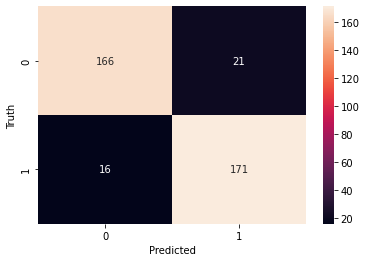

In [32]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       187
           1       0.89      0.91      0.90       187

    accuracy                           0.90       374
   macro avg       0.90      0.90      0.90       374
weighted avg       0.90      0.90      0.90       374



In [34]:
reviews = [
    'Enter a chance to win $5000, hurry up, offer valid until march 31, 2021',
    'You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99',
    'it to 80488. Your 500 free text messages are valid until 31 December 2005.',
    'Hey Sam, Are you coming for a cricket game tomorrow',
    "Why don't you wait 'til at least wednesday to see if you get your ."
]
model.predict(reviews)

array([[0.7181037 ],
       [0.80937934],
       [0.7267943 ],
       [0.18356158],
       [0.1052879 ]], dtype=float32)

In [35]:
model.save("saved/model1/")

In [36]:
model.save("saved/model2/")

In [37]:
model.save("saved/model3/")